In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

# 로그 데이터를 가져온다

In [56]:
df=pd.read_csv(r'runs\classify\train\results.csv')
df

,epoch,time,train/loss,metrics/accuracy_top1,metrics/accuracy_top5,val/loss,lr/pg0,lr/pg1,lr/pg2
0,1,182.316,1.38511,0.44,1,1.34260,0.000150,0.000150,0.000150
1,2,383.894,1.27816,0.32,1,1.35590,0.000311,0.000311,0.000311
2,3,602.694,1.20967,0.24,1,1.50615,0.000472,0.000472,0.000472
3,4,863.280,1.09694,0.20,1,1.54025,0.000631,0.000631,0.000631
4,5,1342.210,1.07684,0.32,1,2.05580,0.000789,0.000789,0.000789
...,...,...,...,...,...,...,...,...,...
295,296,59383.300,0.01176,0.36,1,3.41900,0.000033,0.000033,0.000033
296,297,59538.700,0.01772,0.36,1,3.41713,0.000029,0.000029,0.000029
297,298,59869.700,0.01467,0.36,1,3.42038,0.000025,0.000025,0.000025
298,299,60228.600,0.01814,0.36,1,3.49611,0.000021,0.000021,0.000021


In [57]:
del df['metrics/accuracy_top5']

# 각 epoch 마다 train/loss, metrics/accuracy_top1, val/loss 확인

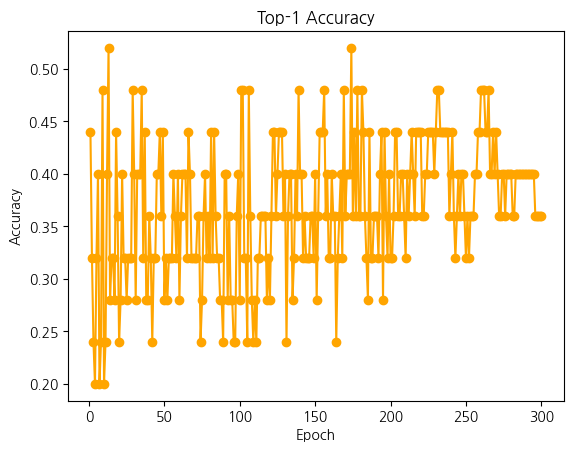

In [58]:
plt.plot(df['epoch'], df['metrics/accuracy_top1'], marker='o', color='orange')
plt.title('Top-1 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [59]:

model.train(data='./dataset',#훈련 데이터(문제집)
            epochs=300,#훈련횟수(며칠동안 공부할건지)
            imgsz=640,#사진 크기(난이도)
            batch=64,#한번에 몇개의 사진을 훈련할건지(하루에 몇 페이지를 풀건지)
            augment=True,#사진을 조작할거냐?(변형문제가 있는지)
            patience=0#훈련이 멈추는 횟수(몇일동안 공부했는데도 실력이 안늘면 그만두는거지 뭐) 
              )

AttributeError: 'LinearRegression' object has no attribute 'train'

In [41]:
df['day']=df['time']//(60*60*24)
df['hour'] = df['time']%(60*60*24)//(60*60)
df['minute'] = df['time']%(60*60)//60
df['second'] = df['time']%60
df

,epoch,time,train/loss,metrics/accuracy_top1,val/loss,lr/pg0,lr/pg1,lr/pg2,day,hour,minute,second
0,1,182.316,1.38511,0.44,1.34260,0.000150,0.000150,0.000150,0.0,0.0,3.0,2.316
1,2,383.894,1.27816,0.32,1.35590,0.000311,0.000311,0.000311,0.0,0.0,6.0,23.894
2,3,602.694,1.20967,0.24,1.50615,0.000472,0.000472,0.000472,0.0,0.0,10.0,2.694
3,4,863.280,1.09694,0.20,1.54025,0.000631,0.000631,0.000631,0.0,0.0,14.0,23.280
4,5,1342.210,1.07684,0.32,2.05580,0.000789,0.000789,0.000789,0.0,0.0,22.0,22.210
...,...,...,...,...,...,...,...,...,...,...,...,...
256,257,52473.400,0.02333,0.40,2.91733,0.000194,0.000194,0.000194,0.0,14.0,34.0,33.400
257,258,52606.400,0.04172,0.44,2.93368,0.000190,0.000190,0.000190,0.0,14.0,36.0,46.400
258,259,52742.500,0.03785,0.44,2.98003,0.000186,0.000186,0.000186,0.0,14.0,39.0,2.500
259,260,52872.300,0.03228,0.48,2.98338,0.000182,0.000182,0.000182,0.0,14.0,41.0,12.300


In [42]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()
model.fit(df[['epoch']],df['time'])
df

,epoch,time,train/loss,metrics/accuracy_top1,val/loss,lr/pg0,lr/pg1,lr/pg2,day,hour,minute,second
0,1,182.316,1.38511,0.44,1.34260,0.000150,0.000150,0.000150,0.0,0.0,3.0,2.316
1,2,383.894,1.27816,0.32,1.35590,0.000311,0.000311,0.000311,0.0,0.0,6.0,23.894
2,3,602.694,1.20967,0.24,1.50615,0.000472,0.000472,0.000472,0.0,0.0,10.0,2.694
3,4,863.280,1.09694,0.20,1.54025,0.000631,0.000631,0.000631,0.0,0.0,14.0,23.280
4,5,1342.210,1.07684,0.32,2.05580,0.000789,0.000789,0.000789,0.0,0.0,22.0,22.210
...,...,...,...,...,...,...,...,...,...,...,...,...
256,257,52473.400,0.02333,0.40,2.91733,0.000194,0.000194,0.000194,0.0,14.0,34.0,33.400
257,258,52606.400,0.04172,0.44,2.93368,0.000190,0.000190,0.000190,0.0,14.0,36.0,46.400
258,259,52742.500,0.03785,0.44,2.98003,0.000186,0.000186,0.000186,0.0,14.0,39.0,2.500
259,260,52872.300,0.03228,0.48,2.98338,0.000182,0.000182,0.000182,0.0,14.0,41.0,12.300


In [44]:
def GetDay(epoch):
    time=model.predict([[epoch]])[0]
    day=time//(60*60*24)
    hour = time%(60*60*24)//(60*60)
    minute = time%(60*60)//60
    second = time%60
    return day, hour, minute, second


In [45]:
days=[]
hours=[]
minutes=[]
seconds=[]
epochs=range(1,301)
for i in epochs:
    day,hour,minute,second=GetDay(i)
    days.append(day)
    hours.append(hour)
    minutes.append(minute)
    seconds.append(second)
df=pd.DataFrame({'일':days,'시간':hours,'분':minutes,'초초':seconds},index=epochs)
df.index.name='epoch'
df


c:\Users\anyou\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\anyou\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\anyou\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\anyou\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\anyou\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Line

,일,시간,분,초초
epoch,,,,
1,0.0,0.0,32.0,53.616157
2,0.0,0.0,36.0,25.815838
3,0.0,0.0,39.0,58.015519
4,0.0,0.0,43.0,30.215200
5,0.0,0.0,47.0,2.414881
...,...,...,...,...
296,0.0,17.0,56.0,12.522058
297,0.0,17.0,59.0,44.721739
298,0.0,18.0,3.0,16.921420
